<a href="https://colab.research.google.com/github/arjunprithvi3/Chatbot/blob/main/SolarIrradianceForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jajapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210077 sha256=44f2227f24eaea52cd5e6bb43648ede2b259d27f68bd89f120c94e9851520541
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
pip install joblib

In [ ]:
import csv
import os
import numpy as np
import jajapy as ja
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/solar_plant.csv')
print(df)

          DATE  MONTH  cloud cover  humidity  pressure  global radiation  \
0     20000101      1            8      0.89    1.0286              0.20   
1     20000102      2            8      0.87    1.0318              0.25   
2     20000103      3            5      0.81    1.0314              0.50   
3     20000104      4            7      0.79    1.0262              0.63   
4     20000105      5            5      0.90    1.0246              0.51   
...        ...    ...          ...       ...       ...               ...   
3649  20091228     12            7      0.82    1.0084              0.28   
3650  20091229     12            7      0.92    1.0028              0.22   
3651  20091230     12            8      0.92    0.9979              0.07   
3652  20091231     12            7      0.93    0.9958              0.17   
3653  20100101      1            8      0.93    0.9965              0.08   

      precipitation  sunshine  temp_mean  temp_min  ...  temp_min.2  \
0              0

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

# Specify the path to your CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/solar_plant.csv'

# Read data from the CSV file
data = pd.read_csv(csv_file_path)
print(data)

Mounted at /content/drive
          DATE  MONTH  cloud cover  humidity  pressure  global radiation  \
0     20000101      1            8      0.89    1.0286              0.20   
1     20000102      2            8      0.87    1.0318              0.25   
2     20000103      3            5      0.81    1.0314              0.50   
3     20000104      4            7      0.79    1.0262              0.63   
4     20000105      5            5      0.90    1.0246              0.51   
...        ...    ...          ...       ...       ...               ...   
3649  20091228     12            7      0.82    1.0084              0.28   
3650  20091229     12            7      0.92    1.0028              0.22   
3651  20091230     12            8      0.92    0.9979              0.07   
3652  20091231     12            7      0.93    0.9958              0.17   
3653  20100101      1            8      0.93    0.9965              0.08   

      precipitation  sunshine  temp_mean  temp_min  ...  temp

['cloud_cover' 'wind_speed' 'wind_gust' 'humidity' 'pressure' 'temp_mean'
 'temp_min' 'temp_max']
Dimension of our training set: (107, 7, 8)

First sequence in the training set:
 [[ 7.      2.5     8.      0.97    1.024   6.1     3.5     8.1   ]
 [ 8.      3.7     9.      0.97    1.0267  7.3     5.4     8.7   ]
 [ 8.      6.1    13.      0.94    1.0203  8.4     6.4     9.6   ]
 [ 7.      3.8    15.      0.94    1.0142  6.4     4.3     9.4   ]
 [ 3.      4.     12.      0.9     1.0183  4.4     1.4     7.4   ]
 [ 6.      5.2    11.      0.91    1.0152  7.2     4.2     9.1   ]
 [ 7.      4.8    12.      0.92    1.0199  6.1     4.3     7.4   ]]
Learning a GoHMM...
|████████████████████████████████████████| 97 in 25:46.6 (0.06/s) 

HOUR number 2 



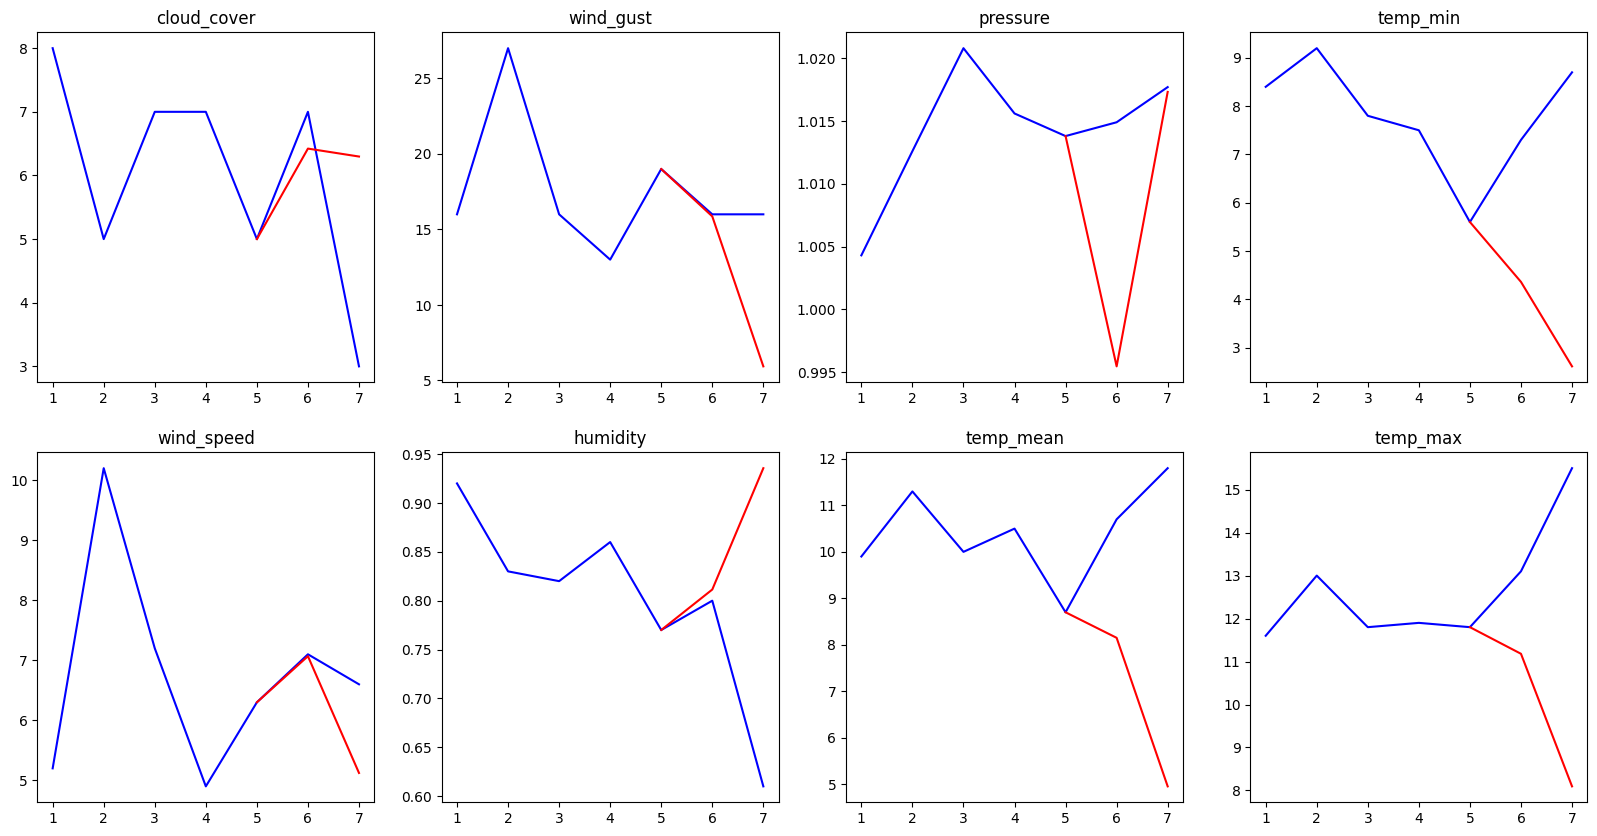


HOUR number 3 



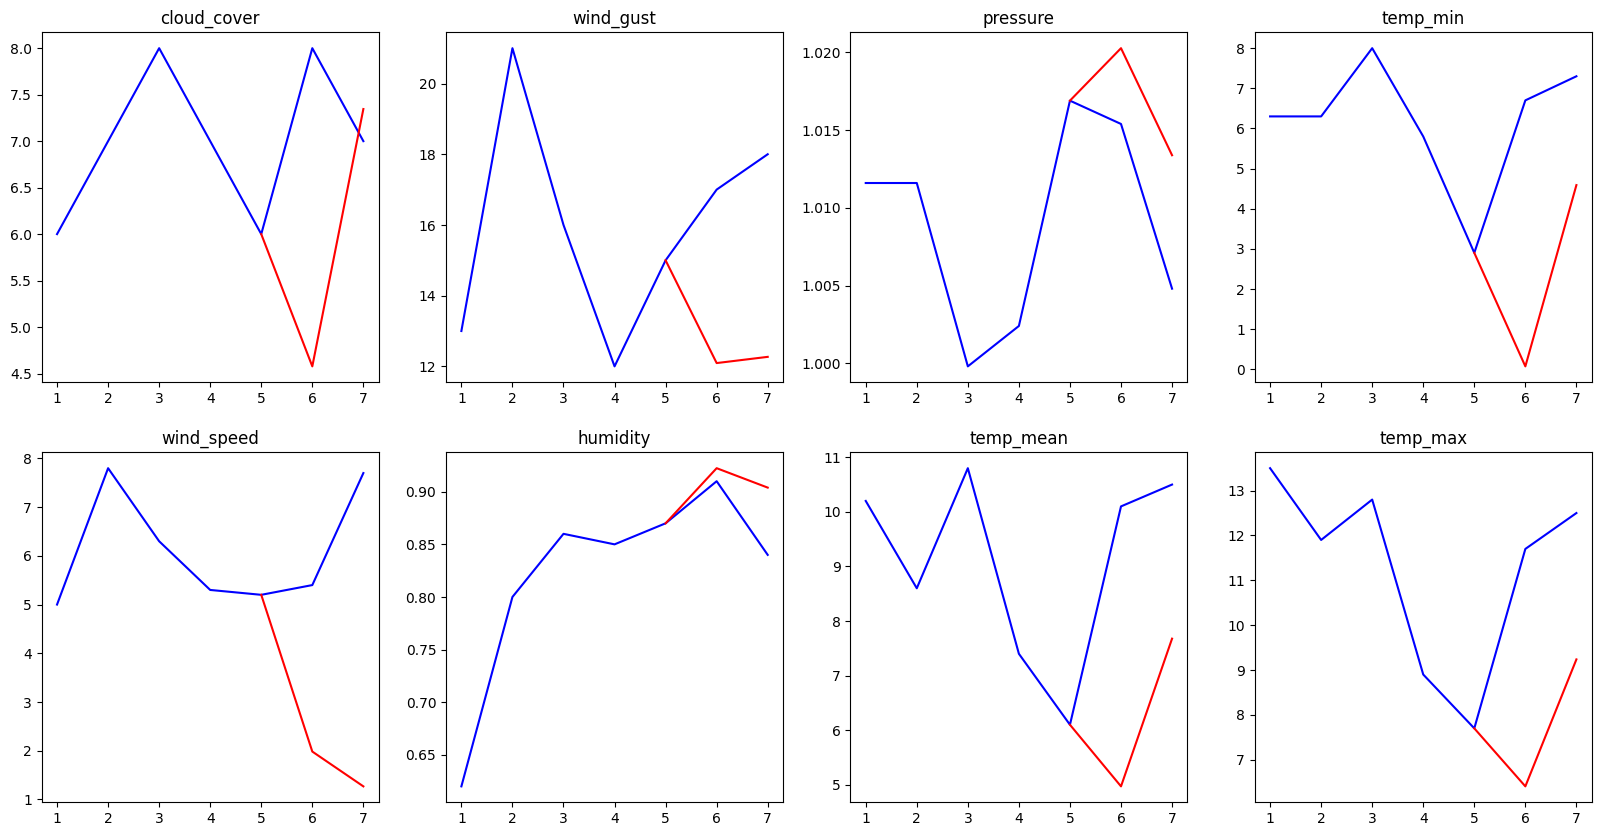

In [ ]:
import pickle
import numpy as np
import jajapy as ja
import matplotlib as mpl
import matplotlib.pyplot as plt
import jajapy as ja
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image, ImageDraw
from numpy import loadtxt, float64, ones, array, argmax, max,min

def training_test_set(cols, len_seq=14):
    arr = np.loadtxt('/content/drive/MyDrive/solar_plant.csv', delimiter=',', dtype=str)
    nb_distributions = len(cols)
    arr = arr[:, cols]
    print(arr[0])

    training_set = np.array(arr[1:751], dtype=np.float64)
    test_set = np.array(arr[751:1001], dtype=np.float64)

    complete_seq = len(training_set) // len_seq
    training_set = training_set[:len(training_set) - len(training_set) % len_seq]
    training_set = training_set.reshape((complete_seq, len_seq, len(cols)))
    training_set = ja.Set(training_set, np.ones(len(training_set)), t=3)

    complete_seq = len(test_set) // len_seq
    test_set = test_set[:len(test_set) - len(test_set) % len_seq]
    test_set = test_set.reshape((complete_seq, len_seq, len(cols)))
    test_set = ja.Set(test_set, np.ones(len(test_set)), t=3)

    training_set.save("my_training_set.txt")

    return training_set, test_set


def testing(m, seq, steps=5):

	alphas = m._initAlphaMatrix(steps)
	alphas = m._updateAlphaMatrix(seq[:steps],0,alphas)
	alphas = alphas[-1]
	current = argmax(alphas)

	forecast = m.run(len(seq)-steps,current)

	fig, axs = plt.subplots(2,4)

	features = ["cloud_cover","wind_speed","wind_gust","humidity","pressure","temp_mean","temp_min","temp_max"]

	for i in range(8):
		axs[i%2][i//2].plot(range(1,len(seq)+1),[seq[j][i] for j in range(len(seq))], c='b')
		axs[i%2][i//2].plot(range(steps,len(seq)+1),[seq[steps-1][i]]+[forecast[j][i] for j in range(len(forecast))], c='r')
		axs[i%2][i//2].set_title(features[i])
	plt.show()

def example_8():

	training_set, test_set = training_test_set([19,20,21,22,23,27,28,29],7)

	print("Dimension of our training set:",training_set.sequences.shape)
	print()
	print("First sequence in the training set:\n",training_set.sequences[0])

	initial_hypothesis = ja.GoHMM_random(nb_states=15, nb_distributions=8,
				      					 min_mu=-5.0,max_mu=5.0,
										 min_sigma=1.0,max_sigma=5.0)



	output_model = ja.BW().fit(training_set, initial_hypothesis)




	for hour in range(1,3,1):
		print("\nHOUR number",hour+1,'\n')
		testing(output_model,test_set.sequences[hour],steps=5)

	with open('m_pickle','wb') as f:
		pickle.dump(output_model,f)


mpl.rcParams['figure.figsize'] = (20,10)


if __name__ == '__main__':
	example_8()

In [ ]:
training_set, test_set = training_test_set([19,20,21,22,23,27,28,29],7)

['cloud_cover' 'wind_speed' 'wind_gust' 'humidity' 'pressure' 'temp_mean'
 'temp_min' 'temp_max']


In [ ]:
with open('m_pickle','rb') as f:
	output_model=pickle.load(f)

In [ ]:
print(output_model)

Name: GoHMM_random_15_states
Initial state: s0
----STATE s0----
s0 -> s1 : 0.01013221784328226927
s0 -> s3 : 0.009109766547555071831
s0 -> s4 : 0.15345163530262326553
s0 -> s5 : 0.35298430035132280697
s0 -> s6 : 0.09727089610702949736
s0 -> s7 : 0.024162096820553352293
s0 -> s8 : 0.15598378422865174767
s0 -> s11 : 0.03659698989048670184
s0 -> s14 : 0.16026663627223606497
************
mean 1: 5.6084
std 1: 1.9891
mean 2: 3.3496
std 2: 1.3262
mean 3: 9.9467
std 3: 3.4211
mean 4: 0.8391
std 4: 0.0953
mean 5: 1.0156
std 5: 0.0105
mean 6: 10.0548
std 6: 6.0691
mean 7: 5.951
std 7: 5.4428
mean 8: 13.9409
std 8: 7.0267

----STATE s1----
s1 -> s1 : 0.095006659409361251844
s1 -> s6 : 0.0052887472807197914774
s1 -> s7 : 0.02748027841757261515
s1 -> s8 : 0.00031883334416114111456
s1 -> s10 : 0.28744940070667667395
s1 -> s11 : 0.5841741763517549005
s1 -> s14 : 0.00018262002714495097089
************
mean 1: 2.4248
std 1: 1.591
mean 2: 1.4426
std 2: 0.3144
mean 3: 5.2675
std 3: 2.2824
mean 4: 0.9466

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


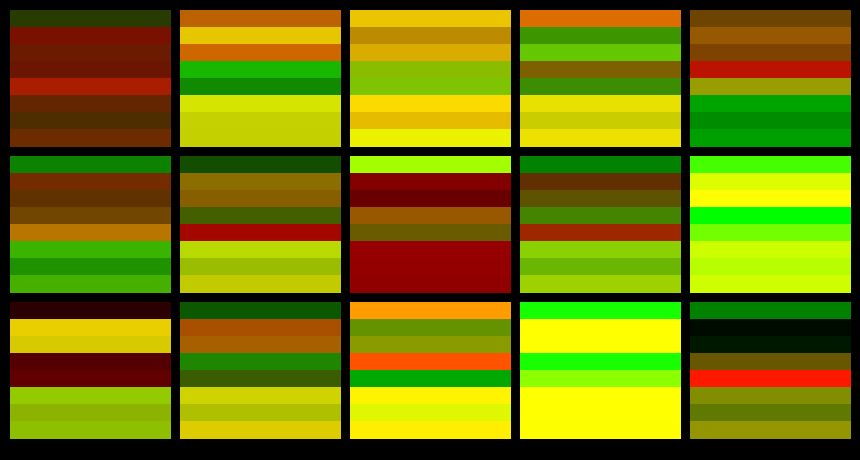

In [ ]:
def draw_states_distributions(m):
	max_mu = max(m.output.T[0],axis=1)
	min_mu = min(m.output.T[0],axis=1)
	max_si = max(m.output.T[1],axis=1)
	min_si = min(m.output.T[1],axis=1)

	from PIL import Image, ImageDraw
	states_x = 5
	states_y = 3
	padx = 10
	pady = 10
	w = 800+(states_x+1)*padx

	h = 420+(states_y+1)*pady
	d_w = 800//(states_x)
	d_h = 420//(states_y*m.nb_distributions)
	img = Image.new("RGB", (w,h))
	img1 = ImageDraw.Draw(img)
	for s in range(m.nb_states):
		for d in range(m.nb_distributions):
			sx = padx*(1+s%states_x)+d_w*(s%states_x)
			sy = pady*(1+s//states_x)+d_h*m.nb_distributions*(s//states_x)+d_h*d
			shape = [(sx,sy), (sx+d_w, sy+d_h)]
			img1.rectangle(shape, fill =(int(255-255*(m.output[s][d][0]-min_mu[d])/(max_mu[d]-min_mu[d])),int(255-255*(m.output[s][d][1]-min_si[d])/(max_si[d]-min_si[d])),0))
	display(img)
draw_states_distributions(output_model)